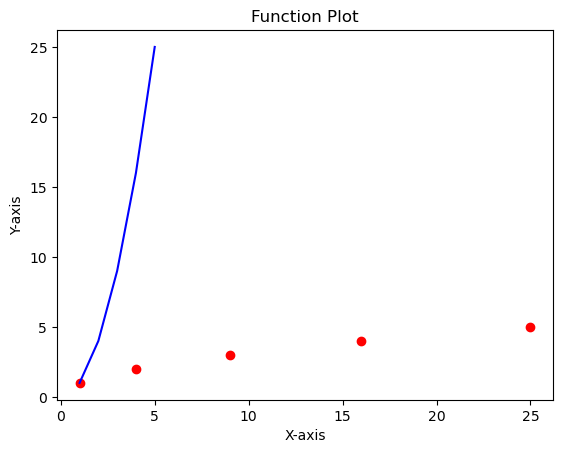

In [1]:
import matplotlib.pyplot as plt

def plot_function(X, Y, color='b', ax=None, plot_type='line'):
    """
    Plots a function based on given X and Y data points.
    
    Parameters:
    X (list or array-like): The x-coordinates of the data points.
    Y (list or array-like): The y-coordinates of the data points.
    color (str, optional): Color of the plot line. Default is 'b' (blue).
    ax (matplotlib.axes.Axes, optional): An Axes object for plotting.
    plot_type (str, optional): Type of plot ('line' or 'scatter'). Default is 'line'.
    
    Returns:
    matplotlib.axes.Axes: The Axes object used for the plot.
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    if plot_type == 'line':
        ax.plot(X, Y, color=color)
    elif plot_type == 'scatter':
        ax.scatter(X, Y, color=color)
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Function Plot')
    
    return ax

# Example usage
X = [1, 2, 3, 4, 5]
Y = [1, 4, 9, 16, 25]

# First plot (line plot)
ax = plot_function(X, Y, color='b', plot_type='line')

# Subsequent plot on the same Axes (scatter plot)
plot_function(Y, X, color='r', ax=ax, plot_type='scatter')

# Show all plots
plt.show()

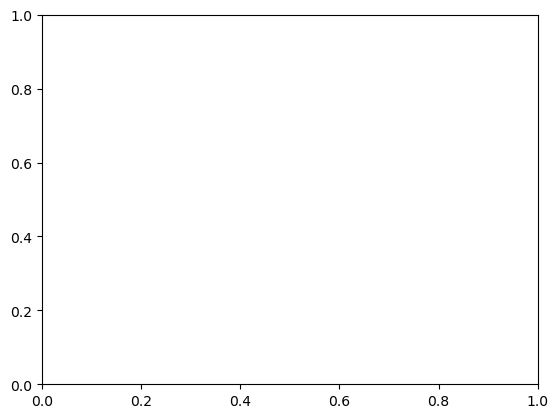

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Sample data
X1 = np.random.rand(10, 2)
X2 = np.random.rand(10, 2)
X3 = np.random.rand(10, 2)

# All data sets
data_sets = [X1, X2, X3]

fig, ax = plt.subplots()

# Initialize empty scatter plots for each dataset
scatters = [ax.scatter([], [], color='black') for _ in data_sets]

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return scatters

def animate(frame):
    total_points = len(X1)  # Assuming all data sets have the same length
    dataset_index = frame // total_points  # Determine which dataset we are on
    point_index = frame % total_points  # Determine index within the dataset

    if dataset_index < len(data_sets):
        data = data_sets[dataset_index]
        
        # Update scatter plot data
        offsets = scatters[dataset_index].get_offsets()
        
        # If this is the first point, initialize offsets
        if offsets.size == 0:
            offsets = np.zeros((total_points, 2))
        
        # Update the current point to red
        offsets[point_index] = data[point_index]
        colors = ['black'] * total_points
        colors[point_index] = 'red'
        
        scatters[dataset_index].set_offsets(offsets)
        scatters[dataset_index].set_color(colors)
        
        # If this is the last point of the dataset, set all points to black
        if point_index == total_points - 1:
            scatters[dataset_index].set_color('black')
    
    return scatters



# Total frames are the number of datasets multiplied by the number of points in each dataset
frames = len(X1) * len(data_sets)

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=frames, interval=200, blit=True)

plt.show()
init()

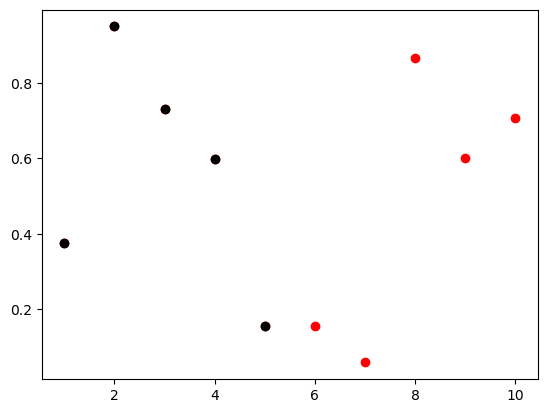

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Generate random Y1 and Y2 values
np.random.seed(42)  # For reproducibility
X1 = np.array([1, 2, 3, 4, 5])
Y1 = np.random.rand(len(X1))  # Generates random float numbers in range [0, 1)
X2 = np.array([6, 7, 8, 9, 10])
Y2 = np.random.rand(len(X2))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot X1 sequentially with a delay
for x, y in zip(X1, Y1):
    ax.scatter(x, y, color='red')
    time.sleep(0.2)  # Delay in seconds

# Change the color of X1 points to black
ax.scatter(X1, Y1, color='black')

# Plot X2 in red
ax.scatter(X2, Y2, color='red')

plt.show()


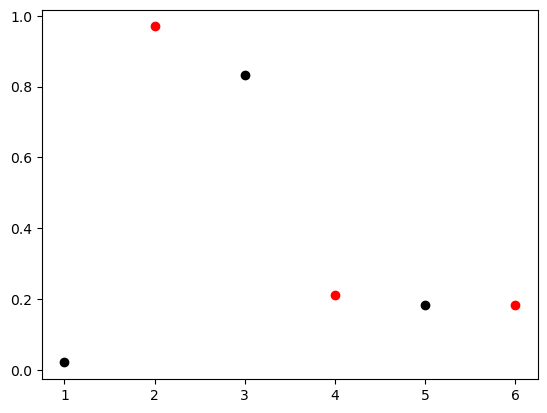

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, HTML

class AnimatedScatterPlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.points = []
        self.current_color = 'red'
        self.animation = None

    def add_points(self, X, Y):
        if self.animation is not None:
            self.animation.event_source.stop()
        
        self.points.extend(zip(X, Y))
        self.update_plot()

    def update_plot(self):
        self.ax.clear()  # Clear the plot
        for x, y in self.points:
            if self.current_color == 'red':
                self.ax.scatter(x, y, color=self.current_color)
            else:
                self.ax.scatter(x, y, color=self.current_color)
            
            self.current_color = 'black' if self.current_color == 'red' else 'red'

        if self.animation is None:
            self.animation = animation.FuncAnimation(self.fig, self.update_plot, frames=len(self.points)*2, interval=500)
            display(self.animation)

# Example usage
plotter = AnimatedScatterPlot()

# Adding first set of points
plotter.add_points(np.array([1, 2, 3]), np.random.rand(3))

# Adding second set of points
plotter.add_points(np.array([4, 5, 6]), np.random.rand(3))


TypeError: update() got an unexpected keyword argument 'X'

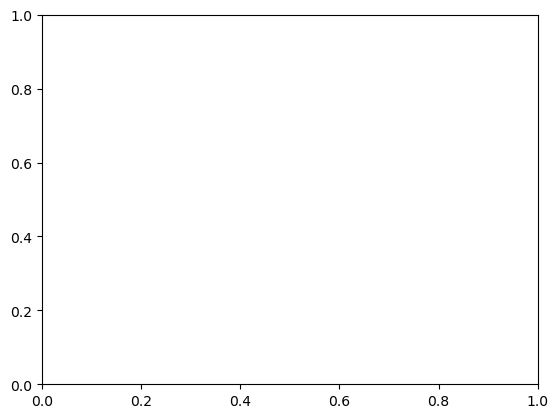

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

# Generate random Y1 and Y2 values
np.random.seed(42)  # For reproducibility
X1 = np.array([1, 2, 3, 4, 5])
Y1 = np.random.rand(len(X1))  # Generates random float numbers in range [0, 1)
X2 = np.array([6, 7, 8, 9, 10])
Y2 = np.random.rand(len(X2))

# Initialize the figure and axis
fig, ax = plt.subplots()

# Update function to draw scatter plot
def update(frame):
    # Clear the current plot
    ax.cla()
    
    # Check if we are adding X1 points
    if frame <= len(X1):
        # Plot X1 points sequentially with a delay
        for x, y in zip(X1[:frame], Y1[:frame]):
            ax.scatter(x, y, color='red')
    else:
        # Change the color of X1 points to black
        ax.scatter(X1, Y1, color='black')
        
        # Check if we are adding X2 points
        if frame - len(X1) < len(X2):
            # Plot X2 points sequentially with a delay
            for x, y in zip(X2[:frame-len(X1)], Y2[:frame-len(X1)]):
                ax.scatter(x, y, color='red')
        else:
            # Change the color of X2 points to black
            ax.scatter(X2, Y2, color='black')

            
# Create an animation object

ani = animation.FuncAnimation(fig, update(X=X1,Y=Y1, ax = ax), frames=20, interval=1000)

# Convert the animation to JavaScript and display it
HTML(ani.to_jshtml())


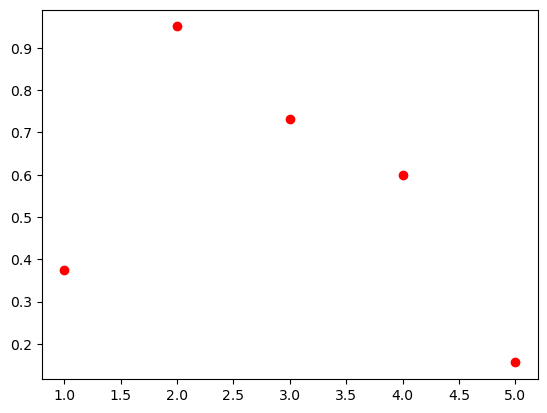

In [6]:
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from functools import partial

# Generate random Y1 and Y2 values
np.random.seed(42)  # For reproducibility
X1 = np.array([1, 2, 3, 4, 5])
Y1 = np.random.rand(len(X1))  # Generates random float numbers in range [0, 1)
X2 = np.array([6, 7, 8, 9, 10])
Y2 = np.random.rand(len(X2))

# Initialize the figure and axis
fig, ax = plt.subplots()

# Define the update function to accept frame, X, Y, and ax as parameters
def update(frame, X=None, Y=None, ax=None):
    ax.cla()  # Clear the current plot
    for x, y in zip(X[:frame] , Y[:frame]):
        ax.scatter(x,y, color='red')
    # Your logic here to plot X1 and X2 points based on the frame number
    # Use X, Y, and ax as needed within the function

# Create a partial function with the initial values for X, Y, and ax
update_partial = partial(update, X=X1, Y=Y1, ax=ax)

# Create an animation object using the partial function
ani = animation.FuncAnimation(fig, update_partial, frames=20, interval=1000)

# Convert the animation to JavaScript and display it
HTML(ani.to_jshtml())


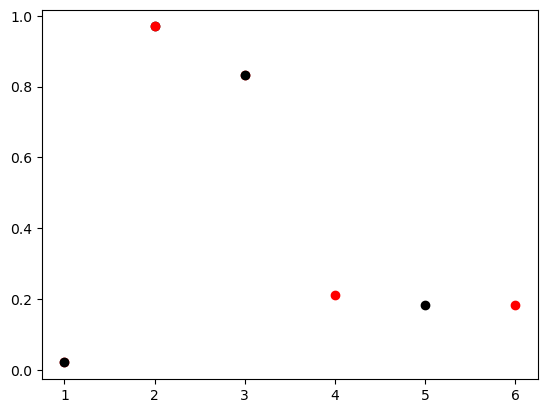

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, HTML

class AnimatedScatterPlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.points = []
        self.current_color = 'red'
        self.animation = None

    def add_points(self, X, Y):
        if self.animation is not None:
            self.animation.event_source.stop()
        
        self.points.extend(zip(X, Y))
        self.update_plot(len(self.points))

    def update_plot(self, i):
        for x, y in self.points:
            if self.current_color == 'red':
                self.ax.scatter(x, y, color=self.current_color)
            else:
                self.ax.scatter(x, y, color=self.current_color)
            
            self.current_color = 'black' if self.current_color == 'red' else 'red'

        if self.animation is None:
            self.animation = animation.FuncAnimation(self.fig, self.update_plot, frames=len(self.points)*2, interval=2000)
            display(self.animation)

# Example usage
plotter = AnimatedScatterPlot()

# Adding first set of points
plotter.add_points(np.array([1, 2, 3]), np.random.rand(3))

# Adding second set of points
plotter.add_points(np.array([4, 5, 6]), np.random.rand(3))


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, HTML

class AnimatedScatterPlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.points = []
        self.current_color = 'red'
        self.animation = None
        self.batch_size = 5

    def add_points(self, X, Y):
        if self.animation is not None:
            self.animation.event_source.stop()
        self.points.extend(zip(X, Y))
    
    def show(self):
        self.update_plot(0)

    def update_plot(self, i):
        self.ax.clear()  # Clear the plot
        
        for k in range(0, i)
        
        for x, y in self.points:
            if self.current_color == 'red':
                self.ax.scatter(x, y, color=self.current_color)
            else:
                self.ax.scatter(x, y, color=self.current_color)
            
            self.current_color = 'black' if self.current_color == 'red' else 'red'

        if self.animation is None:
            self.animation = animation.FuncAnimation(self.fig, self.update_plot, frames=len(self.points)*2, interval=2000)
            display(self.animation)

    def redraw(self):
        """Manually redraw the plot."""
        if self.animation is not None:
            self.animation.event_source.stop()
            self.animation = None
        self.update_plot(0)  # Start the animation from the beginning

# Example usage
plotter = AnimatedScatterPlot()

# Adding first set of points
plotter.add_points(np.array([1, 2, 3]), np.random.rand(3))

# Adding second set of points
plotter.add_points(np.array([4, 5, 6]), np.random.rand(3))

# Redrawing the plot after adding new points
plotter.show()


SyntaxError: invalid syntax (4096123657.py, line 26)